<a href="https://colab.research.google.com/github/ReginaGH/AB_testing/blob/main/AB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats import proportion

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DeltStack')
warnings.warn('Do not show this message')

from google.colab import drive
from google_drive_downloader import GoogleDriveDownloader as gdd

In [3]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = stats.pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Groups are different (reject H0)')
else:
    print('Groups are similar (fail to reject H0)')

stat=0.688, p=0.028
Groups are different (reject H0)


коэффициент корреляции = 0,688 сильный. 

In [4]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Learning/ab_stats_LECTION_8.csv')
data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


* revenue - выручка
* num_purchase - кол-во покупок
* purchase - была покупка или нет (0 - нет, 1 -да)
* группы (А - контрольная, B - тестовая)
* av_site visit - кол-во визитов в среднем на юзера

In [15]:
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [17]:
data.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

In [20]:
data[data['revenue'] > 0].head(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759
113,2.773650,1,1,A,4.212117
114,8.719624,2,1,A,7.819230
155,11.220020,3,1,A,7.949321
213,19.990000,1,1,A,7.303251
233,3.931527,1,1,A,2.970793


In [22]:
data[data['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11835.000000,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631,6.974724
std,13.133218,1.467511,0.145481,2.023533
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.656155
50%,0.000000,0.000000,0.000000,6.982329
75%,0.000000,0.000000,0.000000,8.345572
max,1303.609284,152.000000,1.000000,17.728836


In [23]:
data[data['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11817.000000,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802,7.051559
std,3.176534,0.418480,0.139325,3.976799
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.380984
50%,0.000000,0.000000,0.000000,7.060873
75%,0.000000,0.000000,0.000000,9.768648
max,113.830000,25.000000,1.000000,22.446822


### Проверка данных на нормальность

Метрика - количество визитов на юзера

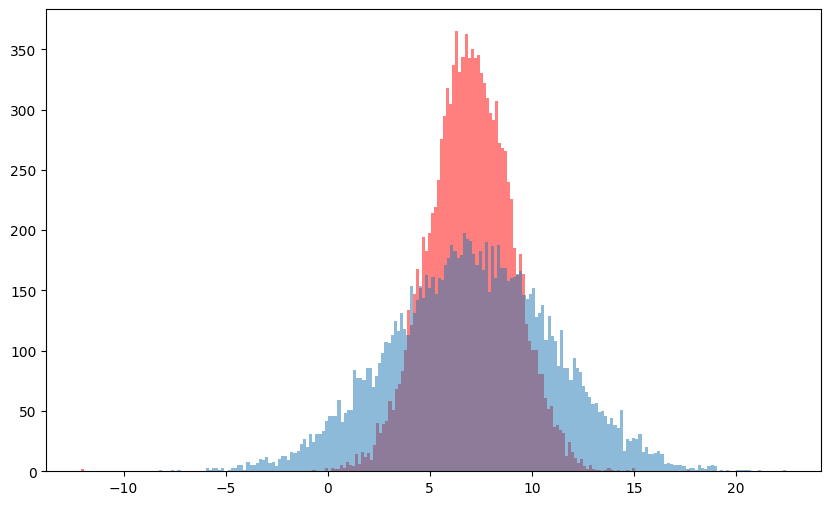

In [40]:
plt.figure(figsize=(10,6))
control_visit_all = data['av_site visit'][data['ab_group']=='A']
test_visit_all = data['av_site visit'][data['ab_group']=='B']

plt.hist(control_visit_all, color='r', alpha=0.5, bins=200)
plt.hist(test_visit_all, alpha=0.5, bins=200);

In [41]:
stats.ttest_ind(control_visit_all, test_visit_all, equal_var=False)

Ttest_indResult(statistic=-1.872183970103851, pvalue=0.06119777801292236)

### Метрика "доля юзеров с покупкой"

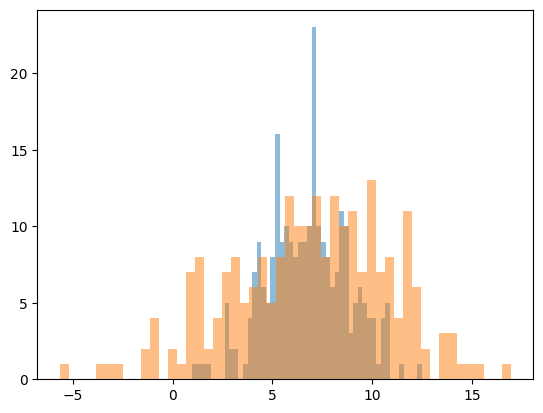

In [46]:
plt.Figure(figsize=(20,6))
control_purchase = data['av_site visit'][(data['ab_group']=='A')&(data['purchase']==1)]
test_purchase = data['av_site visit'][(data['ab_group']=='B')&(data['purchase']==1)]

plt.hist(control_purchase, alpha=0.5, bins=50)
plt.hist(test_purchase, alpha=0.5, bins=50)
plt.show();

In [48]:
data.purchase.value_counts() # посмотрим всего сколько было транзакций с покупками (490)

0    23162
1      490
Name: purchase, dtype: int64

In [50]:
# суммируем покупки по группам:
pur_a= data[data['ab_group']=='A']['purchase'].sum()
pur_b= data[data['ab_group']=='B']['purchase'].sum()
pur_a, pur_b

(256, 234)

In [57]:
num_a = data[data['ab_group']=='A'].shape[0]
num_b = data[data['ab_group']=='B'].shape[0]
num_a, num_b

(11835, 11817)

In [59]:
z_score, pvalue = proportion.proportions_ztest(np.array([pur_a, pur_b]), np.array([num_a, num_b]))
print(f'z-score: {np.round(z_score, 3)}, p-value: {np.round(pvalue, 3)}')

z-score: 0.987, p-value: 0.323


In [60]:
if np.abs(pvalue) < 0.05:
  print('We may reject the null hypotises')
else:
  print('We have failed to reject the null hypotises.')

We have failed to reject the null hypotises.


### Проверяем с непараметрическим ХИ-квадратом

In [65]:
chi_sq, pvalue, table = proportion.proportions_chisquare(np.array([pur_a, pur_b]), np.array([num_a, num_b]))
print(f'Results are chi_square = {np.round(chi_sq,3)}, p-value = {np.round(pvalue, 3)}')

Results are chi_square = 0.975, p-value = 0.323


In [67]:
if np.abs(pvalue) < 0.05:
  print('We may reject the null hypotises')
else:
  print('We have failed to reject the null hypotises')

We have failed to reject the null hypotises


### Метрика ARPU (average revenue per user)
Непараметрический критерий Манна-Уитни

In [9]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


Данные распределены ненормально. Если мы говорим **про выручку, чаще всего они распределены ненормально**

In [12]:
# Чтобы привести данные к норм.виду, используем критерий для 2-х независимых групп, критерий Манна-Уитни. Из данных выбираем выручку по группам:
mw_stats = stats.mannwhitneyu(data[data['ab_group']=='A']['revenue'].values, data[data['ab_group']=='B']['revenue'].values)
mw_stats[1]

0.3243889561742552

Критерий Манна-Уитни не позволяет принять альтернативную гипотезу о разнице ARPU

### Сравним среднее кол-во покупок на пользователя

In [15]:
data.groupby('ab_group')['num_purchases'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.050697,1.467511,0.0,0.0,0.0,0.0,152.0
B,11817.0,0.036473,0.418480,0.0,0.0,0.0,0.0,25.0


In [16]:
mn_stats = stats.mannwhitneyu(data[data['ab_group']=='A']['num_purchases'].values, data[data['ab_group']=='B']['num_purchases'].values)
mn_stats[1]

0.3249718497892071

Тоже не статистически значимых различий

### Посмотрим на пользователей среди платящих

In [34]:
mn_stats = stats.mannwhitneyu(data[(data['ab_group']=='A') & (data['purchase']==1)]['revenue'].values, data[(data['ab_group']=='B') & (data['purchase']==1)]['revenue'].values)
mn_stats[1]

0.8871956616344514

Тоже нет различий

ВЫВОД: 
* По исследованным параметрам раличий между контрольной и тестовой группами не выявлено, значит не целесообразно выкатывать изменения.
* С другой стороны, возможно **нам не хватило мощности, т.е. недостаточно размера выборки**, чтобы делать выводы по текущим результатам

## Кейс с рекламной выручкой

In [ ]:
gdd.download_file_from_google_drive(file_id=)